# Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
from PIL import Image

# Libraries for showing random samples
from numpy import random
import matplotlib
import matplotlib.pyplot as plt

import keras
from keras import layers



# Import Data
IN this section, the following tasks are done


1.   Importing the MNIST handwritten digit dataset from tensorflow.keras.datasets and unpack the x train/test set and the y train/test set([Ref](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data?_gl=1*rt9ejc*_up*MQ..*_ga*NDI3MTg5MDAwLjE3MzAyNTM3NzQ.*_ga_W0YLR4190T*MTczMDI1Mzc3NC4xLjAuMTczMDI1Mzc3NC4wLjAuMA..))
2.   Investigate the size of the train and test sets, including the features and the label in each set
3.   Normalize the data to a range of [0,1] for better training convergence.
4.   Visualize the input of the dataset by displaying 25 random samples



In [14]:
# Load the MNIST dataset
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

# Showing the dimension of the 4 sets
print(f"Dimension of the x_train set: {x_train_raw.shape} \n"
      f"Dimension of the y_train set: {y_train_raw.shape} \n"
      f"Dimension of the x_test set: {x_test_raw.shape} \n"
      f"Dimension of the y_test set: {y_test_raw.shape}")

# Normalize the input pixels from a range of [0,255] to [0,1]
x_train = x_train_raw/255
x_test = x_test_raw/255

input_shape = (28,28,1)
output_classes = 10

Dimension of the x_train set: (60000, 28, 28) 
Dimension of the y_train set: (60000,) 
Dimension of the x_test set: (10000, 28, 28) 
Dimension of the y_test set: (10000,)


By running the code block above, it can be seen that

*  60,000 samples in the dataset are used in training.
*  10,000 samples are usedfor testing (approx 85/15 split)
*  The input map has the size of 28x28



In the code block below, we can inspect the label column of the dataset to see how the desired labels are given.

In [15]:
y_train_raw

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

When run, the block returns an array of the training labels as the single integer output for each instances. However, I will later train a network to output a probability distribution of 10 different classes, each representing the digit from 0 to 9.

Therefore, I must use one-hot encoding to convert these single integer labels into $1\times10$ vectors. The code block below performs this operation and display the dimension of the training and testing labels

In [16]:
# One hot encode the label
y_train = to_categorical(y_train_raw, num_classes=output_classes)
y_test = to_categorical(y_test_raw,num_classes=output_classes)

print(f"Dimension of the y_train set: {y_train.shape} \n"
      f"Dimension of the y_test set: {y_test.shape}")

Dimension of the y_train set: (60000, 10) 
Dimension of the y_test set: (10000, 10)


The code block below is used for visualizing random handwritten digit samples in the dataset

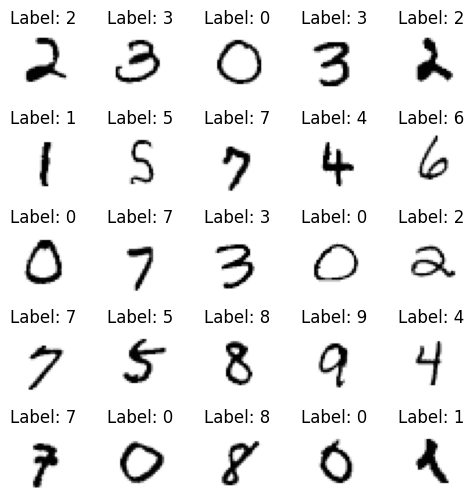

In [17]:
num_samples = 25
rand = random.randint(60000,size = (num_samples))
x_samples = x_train[rand,:,:]
y_samples = np.argmax(y_train[rand,:],axis=1)

fig, axes = plt.subplots(5,5,figsize=(5,5))

for i in range(5):
  for j in range(5):
    ax = axes[i,j]
    ax.imshow(x_samples[i*5+j,:,:], cmap=matplotlib.cm.Greys)
    ax.axis("off")
    ax.set_title(f"Label: {y_samples[i*5+j]}")

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top to make room for title
plt.show()


# Helper Functions

In [51]:
def plot_performance(history, learning_rate=None, batch_size=None):
  fig1, axes1 = plt.subplots(1,2,figsize = (10,5))

  # Accuracy of model training and validation vs training epoch
  acc_ax = axes1[0]
  acc_ax.plot(history.history['accuracy'])
  acc_ax.plot(history.history['val_accuracy'])

  if learning_rate and batch_size:
    acc_ax.set_title(f'Model accuracy \n lr = {learning_rate}, batch size = {batch_size}')
  else: acc_ax.set_title('Model accuracy')

  acc_ax.set_ylabel('Accuracy')
  acc_ax.set_xlabel('Epoch')
  acc_ax.legend(['Training', 'Validation'], loc='best')

  # Loss during model training and validation
  loss_ax = axes1[1]
  loss_ax.plot(history.history['loss'])
  loss_ax.plot(history.history['val_loss'])
  if learning_rate and batch_size:
    loss_ax.set_title(f'Model loss \n lr = {learning_rate}, batch size = {batch_size}')
  else: loss_ax.set_title('Model loss')
  loss_ax.set_ylabel('Loss')
  loss_ax.set_xlabel('Epoch')
  loss_ax.legend(['Training', 'Validation'], loc='best')
  plt.show()
  return

In [44]:
y=12
z = 1

x = 3 if y and z else 4
print(x)

3


# Construct the model

In this section, I shall build a simple 2D CNN borrowing the LeNet architecture, which was originally used for this dataset. This simplified network includes


*   2 convolutional layers, each followed by a max pooling layer
*   1 fully connected layer to output the final classification



In [26]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(output_classes, activation="softmax"),
])

intial_weights = model.get_weights()

model.summary()

c:\Minh Nguyen\TME_6015\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation and Training

In [27]:
batch_size = 128    # The number of samples seen before the model update the weights
epochs = 15         # Number of training episodes
lr = 0.0001          # Learning rate for the optimizer

optimizer1 = keras.optimizers.Adam(
    learning_rate = lr
)

model.compile(loss="categorical_crossentropy",
              optimizer=optimizer1,
              metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5282 - loss: 1.7511 - val_accuracy: 0.9003 - val_loss: 0.3854
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8964 - loss: 0.3659 - val_accuracy: 0.9344 - val_loss: 0.2420
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9299 - loss: 0.2467 - val_accuracy: 0.9469 - val_loss: 0.1886
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9447 - loss: 0.1944 - val_accuracy: 0.9563 - val_loss: 0.1568
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9545 - loss: 0.1545 - val_accuracy: 0.9628 - val_loss: 0.1339
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9617 - loss: 0.1317 - val_accuracy: 0.9668 - val_loss: 0.1182
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9655 - loss: 0.1141 - val_accuracy: 0.9706 - val_loss: 0.1043
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9708 - loss: 0.1027 - val_accu

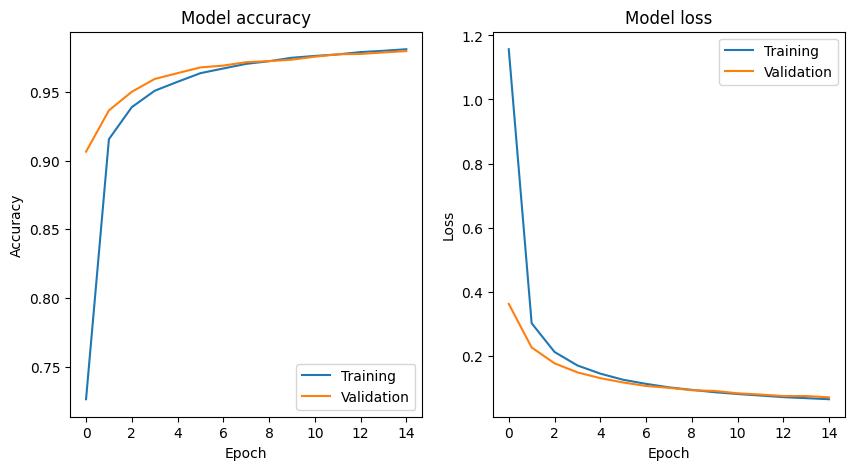

The model has a training accuracy of 0.9812708497047424
The model has a validation accuracy of 0.9799166917800903


In [21]:
plot_performance(history)

print(f"The model has a training accuracy of {history.history['accuracy'][-1]}\n"
      f"The model has a validation accuracy of {history.history['val_accuracy'][-1]}")

# Model Retraining

In this section, I am increasing the number of epochs so that the model can continue learning until it starts to overfit (validation loss starts increasing)

In [ ]:
batch_size = 128    # The number of samples seen before the model update the weights
epochs = 100        # Number of training episodes
lr = 0.0001         # Learning rate for the optimizer


optimizer = keras.optimizers.Adam(
    learning_rate = lr
)
model.set_weights(intial_weights)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer1,
              metrics=["accuracy"])

history_1 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.5685 - loss: 1.6477 - val_accuracy: 0.9195 - val_loss: 0.3113
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9055 - loss: 0.3386 - val_accuracy: 0.9458 - val_loss: 0.1951
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9325 - loss: 0.2331 - val_accuracy: 0.9585 - val_loss: 0.1498
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9483 - loss: 0.1780 - val_accuracy: 0.9680 - val_loss: 0.1214
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9592 - loss: 0.1445 - val_accuracy: 0.9707 - val_loss: 0.1064
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9632 - loss: 0.1218 - val_accuracy: 0.9747 - val_loss: 0.0953
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9681 - loss: 0.1098 - val_accuracy: 0.9760 - val_loss: 0.0872
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9702 - loss: 0.1008 

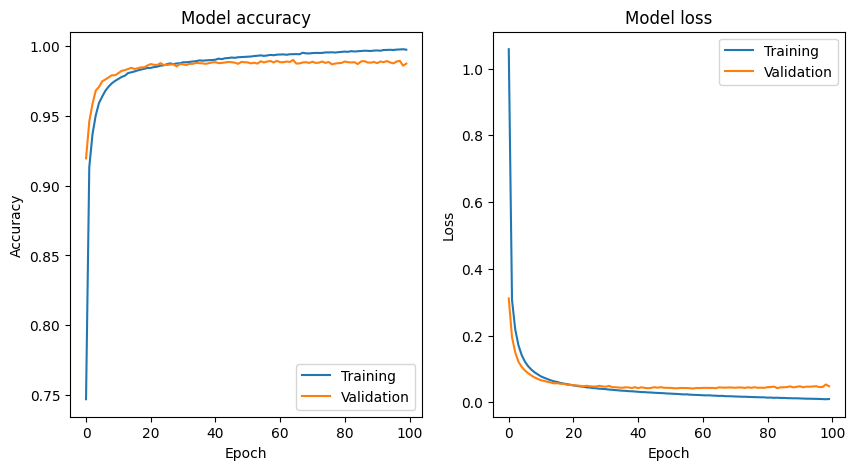

The model has a training accuracy of 42 22=6090- 0.9972962737083435
The model has a validation accuracy of 0.987333357334137


In [24]:
plot_performance(history_1)

print(f"The model has a training accuracy of 42 22=6090- {history_1.history['accuracy'][-1]}\n"
      f"The model has a validation accuracy of {history_1.history['val_accuracy'][-1]}")

One can see that the model has started to overfit around 50 epochs. This number is fixed moving forward for the hyperparameter experiment

# Model Hyperparameter Experiment

## Learning Rate Experiment
In the code block below, the learning rate are varied between [0.0001, 0.001, and 0.1] to evaluate the model training. The number of epochs is fixed at 50 and the batch  size at 128

In [ ]:
history_all = []

batch_size = 128
epochs = 5
lr = [0.001, 0.0005, 0.0001]

for i in range(len(lr)):
    # Reset the weights of the model to start training from the same initial weights
    model.set_weights(intial_weights)

    # Adjust the optimizer with the corresponding learning rate
    optimizer = keras.optimizers.Adam(learning_rate = lr[i])

    model.compile(loss="categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])

    print(f"=== Model training with lr = {lr[i]}, batch size = {batch_size} ===")
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    # Append a dictionary of the training parameters and training history
    history_all.append({
        'learning_rate': lr[i],
        'batch_size': batch_size,
        'history': history
    })

=== Model training with lr = 0.001, batch size = 128 ===
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8188 - loss: 0.6481 - val_accuracy: 0.9780 - val_loss: 0.0803
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9739 - loss: 0.0863 - val_accuracy: 0.9847 - val_loss: 0.0551
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9824 - loss: 0.0576 - val_accuracy: 0.9860 - val_loss: 0.0475
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9854 - loss: 0.0475 - val_accuracy: 0.9875 - val_loss: 0.0438
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9885 - loss: 0.0372 - val_accuracy: 0.9882 - val_loss: 0.0429
=== Model training with lr = 0.005, batch size = 128 ===
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8887 - loss: 0.3543 - val_accuracy: 0.9852 - val_loss: 0.0512
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9844 - loss: 0.0495 - val_accuracy: 0.9833 - val_lo

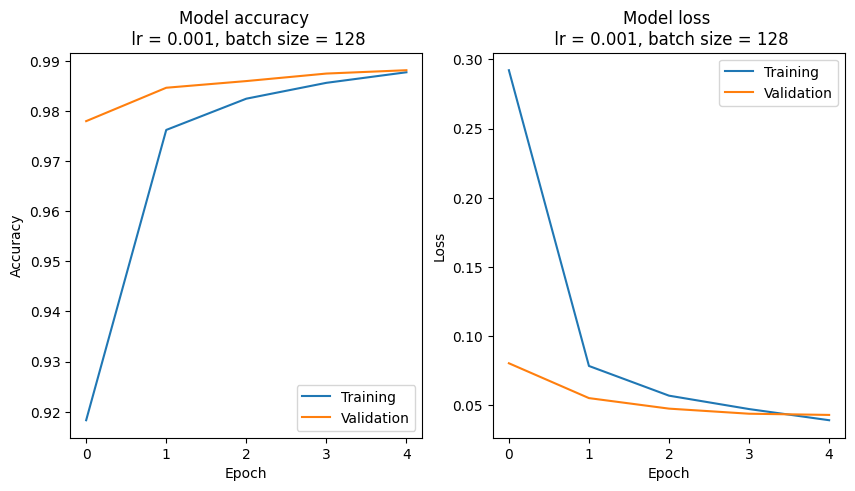

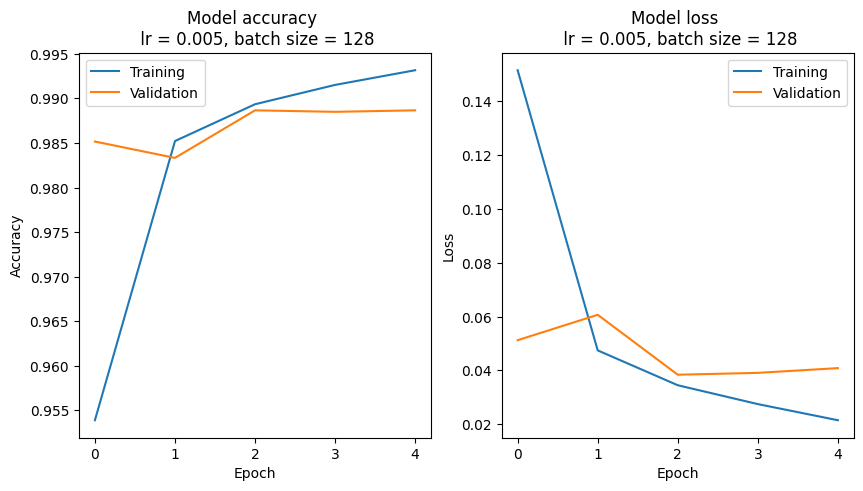

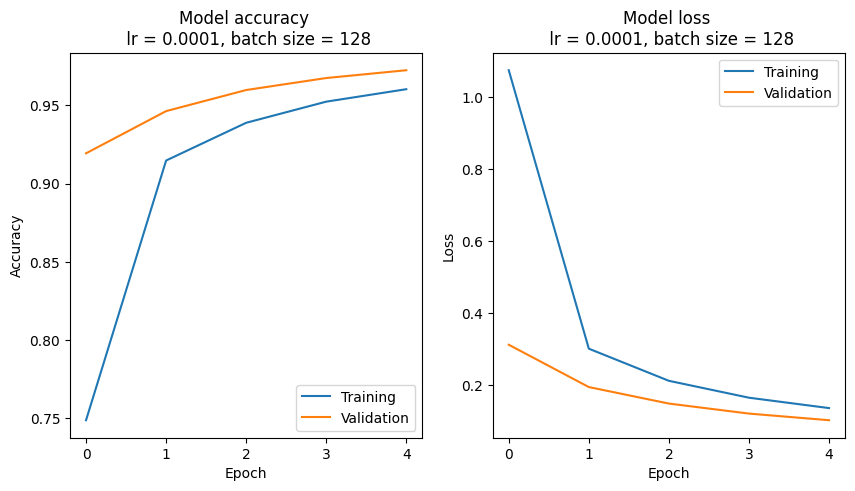

In [52]:
for i in range(len(lr)):
    learning_rate_eps = history_all[i]['learning_rate']
    batch_size_eps = history_all[i]['batch_size']
    plot_performance(history_all[i]['history'],learning_rate_eps,batch_size_eps)

## Batch size experiment

asd